In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
# Set figure parameters
sc.set_figure_params(dpi=100, vector_friendly=True) 
# vector_friendly=True rasterizes large objects (such as dots in a scatterplot as pixels).
# More at https://scanpy.readthedocs.io/en/stable/generated/scanpy.set_figure_params.html

## Data

In this session, we'll work with Visium v1 data from "Immune profiling-based targeting of pathogenic T cells with ustekinumab in ANCA-associated glomerulonephritis" [https://www.nature.com/articles/s41467-024-52525-w](https://www.nature.com/articles/s41467-024-52525-w).

Data is saved at /home/shared/spatial-workshop-GCB-2025/Visium_Ustekinumab_raw.h5ad

## Data overview

In [2]:
## read data - anndata format
data = sc.read("/home/shared/spatial-workshop-GCB-2025/visium_v1_ustekinumab.h5ad")

ℹ️ AnnData stores data as a hierarchical array store HDF5. A brief introduction on what is usually stored and how it can be accessed is here: [AnnData](https://github.com/robinredX/spatial-workshop-GCB-2025/blob/main/slides/anndata-brief.pdf).


In [3]:
## inspect data

print(data.X.max())
display(data.obs.head())
print(data.uns.keys())

4861.0


,in_tissue,array_row,array_col,Slide_ID,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes
AAACGAGACGGTTGAT-1_V5_A,1,35,79,V5_A,3755,8.231110,6068.0,8.710949,9.344100,13.760712,20.583388,35.036256,0.0,0.0,0.0,3755
AAATAGGGTGCTATTG-1_V5_A,1,53,79,V5_A,2479,7.816014,3562.0,8.178358,10.976979,16.254913,24.396407,41.240876,0.0,0.0,0.0,2479
AAATTTGCGGGTGTGG-1_V5_A,1,47,33,V5_A,3869,8.261010,6646.0,8.801921,10.908817,15.573277,22.404454,36.984652,0.0,0.0,0.0,3869
AACAATACATTGTCGA-1_V5_A,1,61,37,V5_A,2250,7.719130,3391.0,8.129175,14.803893,20.406960,28.870540,46.564435,0.0,0.0,0.0,2250
AACGGACGTACGTATA-1_V5_A,1,50,92,V5_A,3765,8.233769,7213.0,8.883779,23.942881,27.783169,33.675308,45.598225,0.0,0.0,0.0,3765


dict_keys(['spatial'])


## Information about data

data.X contains raw counts.  
Slide_ID in .obs contains a unique ID for each Visium slide. They can be used as "batch".  
Condition in .obs contains donor's conditions. Here, all samples are from [ANCA-GN](https://unckidneycenter.org/kidneyhealthlibrary/glomerular-disease/anca-vasculitis/) patients.
.obsm["spatial"] contains center-coordinates of each spot.  
.uns["spatial"] is a dictionary where each key is a Slide ID and each value is a dictionary containing spatial information for that slide. 


In [4]:
slide = "V5_A"
data.uns["spatial"][slide].keys()

dict_keys(['images', 'metadata', 'scalefactors'])

In [5]:
data.uns["spatial"][slide]["images"].keys() 
## Contains same image at two resolutions

dict_keys(['hires', 'lowres'])

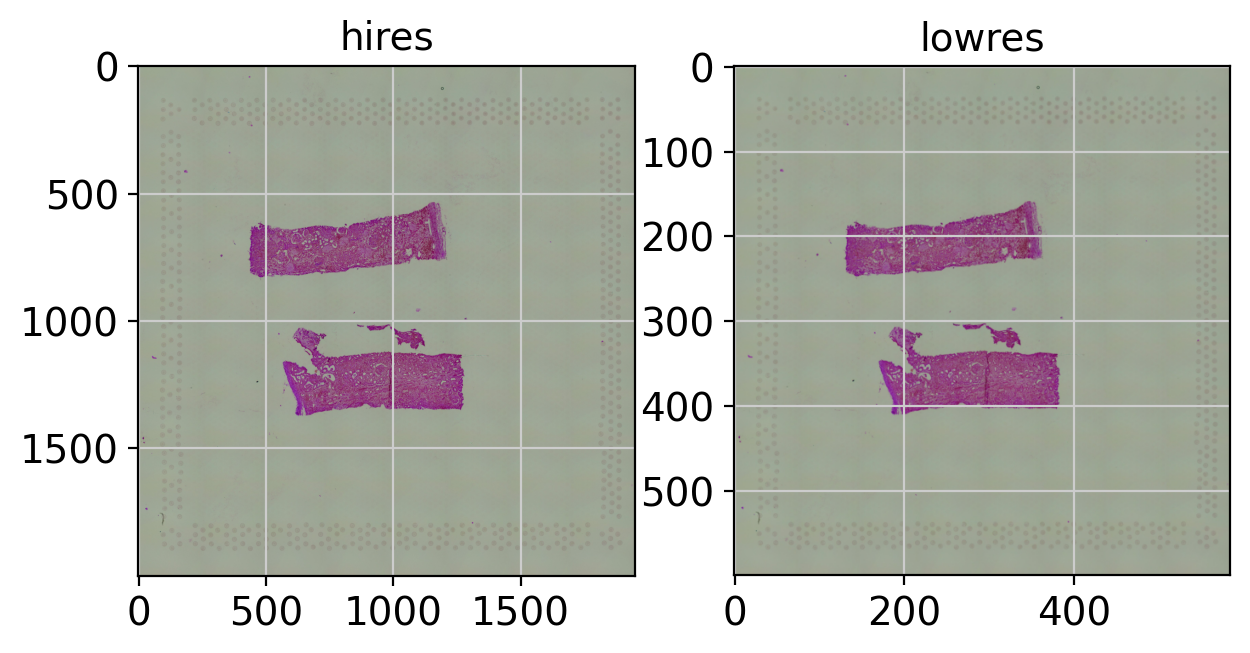

In [6]:
## show bothimages
plt.figure(figsize=(7,7))
ax=plt.subplot(121)
ax.imshow(data.uns["spatial"][slide]["images"]["hires"])
ax.set_title("hires")
ax=plt.subplot(122)
ax.imshow(data.uns["spatial"][slide]["images"]["lowres"])
ax.set_title("lowres")

plt.show()

/tmp/ipykernel_1982/4176094133.py:5: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(sub, library_id=slide, img_key="hires") # library_id specifies the key in .spatial to plot, img_key selects for image to plot. Default is hires.


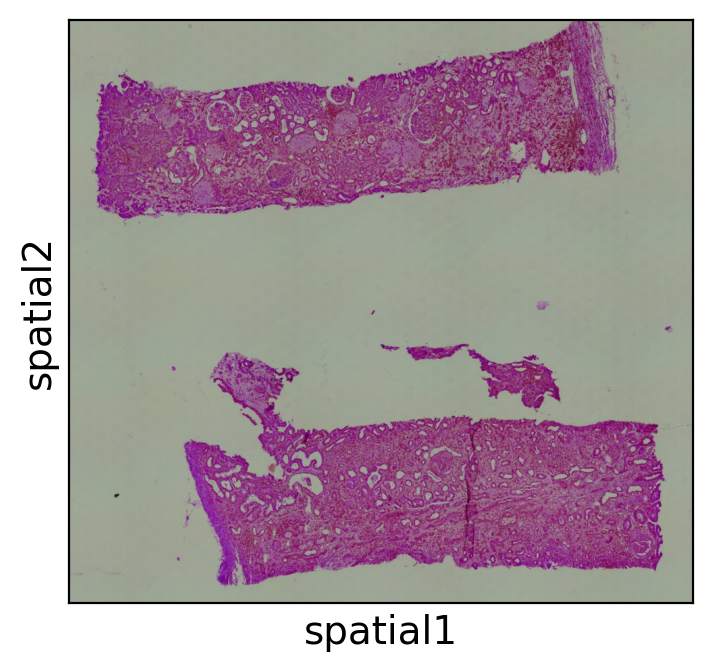

In [7]:
## Images without any feature can be plotted using Scanpy as well

## subset data so only the spots of the slide we are plotting are available
sub = data[data.obs["Slide_ID"]==slide]
sc.pl.spatial(sub, library_id=slide, img_key="hires") # library_id specifies the key in .spatial to plot, img_key selects for image to plot. Default is hires.
# More at [https://scanpy.readthedocs.io/en/1.10.x/api/generated/scanpy.pl.spatial.html](https://scanpy.readthedocs.io/en/1.10.x/api/generated/scanpy.pl.spatial.html).

/tmp/ipykernel_1982/3829516571.py:5: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(sub, color=["NPHS2"], library_id=slide, img_key="hires") # library_id specifies the key in .spatial to plot, img_key selects for image to plot. Default is hires.


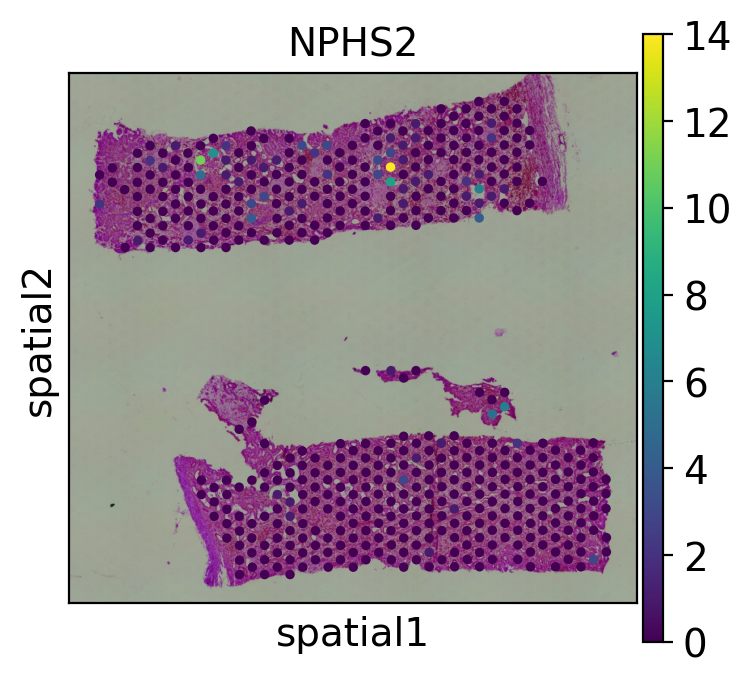

In [8]:
## Images with a feature can be plotted using Scanpy as well

## subset data so only the spots of the slide we are plotting are available
sub = data[data.obs["Slide_ID"]==slide]
sc.pl.spatial(sub, color=["NPHS2"], library_id=slide, img_key="hires") # library_id specifies the key in .spatial to plot, img_key selects for image to plot. Default is hires.
# More at [https://scanpy.readthedocs.io/en/1.10.x/api/generated/scanpy.pl.spatial.html](https://scanpy.readthedocs.io/en/1.10.x/api/generated/scanpy.pl.spatial.html).

Some spots are missing because the spots with less than 2000 total counts have already filtered out.

More information about QC steps are at [Scanpy-basic-analysis](https://scanpy-tutorials.readthedocs.io/en/latest/spatial/basic-analysis.html#qc-and-preprocessing).

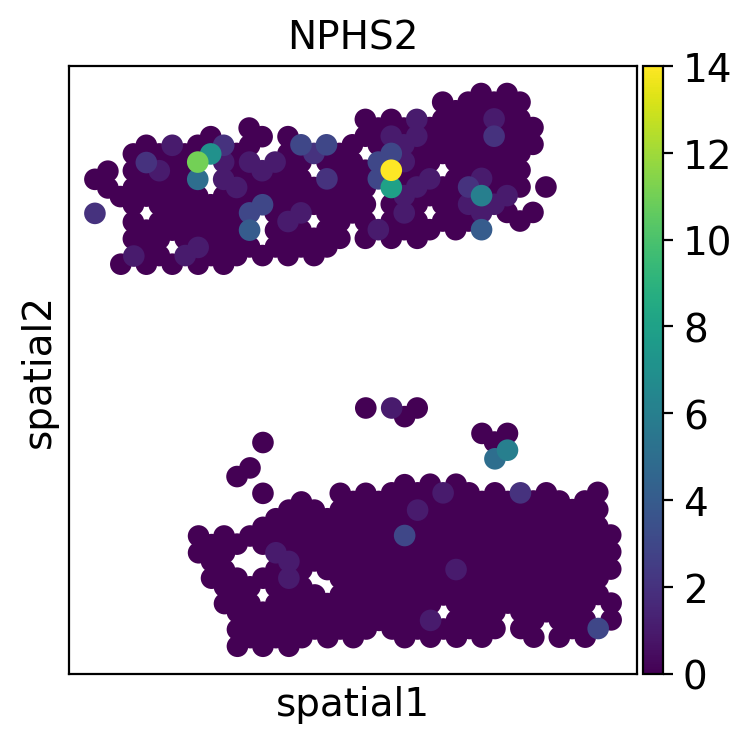

In [9]:
## In cases where image is not need to be plotted but we'd like to see how gene expression (or any other spot-level observation) is spatially organized.

ax=sc.pl.embedding(sub, color="NPHS2", basis="spatial", show=False) # This uses coordinates from "spatial"
ax.invert_yaxis() 
plt.show()

# Without invert_yaxis(), pl.embedding produces y axis that is inverse of pl.spatial. 
# This is because pl.spatial() uses plt.imshow() from matplotlib which produces y-axis from maximum to 0. See in the plt.imshow() calls we used above.

ℹ️ Spatial information .uns["spatial"], .obsm["spatial"] etc. are automatically populated when reading the aligned data with [scanpy.read_visium](https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_visium.html).  
Alignment of Visium data is done with [Spaceranger](https://www.10xgenomics.com/support/software/space-ranger/latest/analysis/inputs/manual-alignment) from 10x.  
NextFlow pipeline: [spacevi](https://nf-co.re/spatialvi/dev/) which also includes standard analysis steps.